In [16]:
import pandas as pd 
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()
df['AMZN'] = data.DataReader('AMZN', data_source='yahoo', start='1-1-2010')['Close']
df['GOOG'] = data.DataReader('GOOG', data_source='yahoo', start='1-1-2010')['Close']
df['MSFT'] = data.DataReader('MSFT', data_source='yahoo', start='1-1-2010')['Close']
df['NFLX'] = data.DataReader('NFLX', data_source='yahoo', start='1-1-2010')['Close']

df.head()

,AMZN,GOOG,MSFT,NFLX
Date,,,,
2010-01-04,6.6950,15.610239,30.950001,7.640000
2010-01-05,6.7345,15.541497,30.959999,7.358571
2010-01-06,6.6125,15.149715,30.770000,7.617143
2010-01-07,6.5000,14.797037,30.450001,7.485714
2010-01-08,6.6760,14.994298,30.660000,7.614286


In [3]:


# Retorno simples dos ativos
df.pct_change().head()



,AMZN,GOOG,MSFT,NFLX
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.005900,-0.004404,0.000323,-0.036836
2010-01-06,-0.018116,-0.025209,-0.006137,0.035139
2010-01-07,-0.017013,-0.023280,-0.010400,-0.017254
2010-01-08,0.027077,0.013331,0.006897,0.017176


In [6]:
r = df.pct_change() #retornos do ativo
w = [0.3, 0.3, 0.2, 0.2] #pesos
R = np.dot(r, w) #retorno do portfólio

In [7]:
vol = df.std()

In [8]:
# retorno simples 
r = df.pct_change()

# média dos retornos anualizados 
mean_returns = r.mean() * 252

# matriz de covariância 
covariance = np.cov(r[1:].T)

In [9]:
# Risco do portfólio anualizado
vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

AttributeError: 'list' object has no attribute 'T'

In [10]:
def generate_wallets(df_close, num_portfolios = 10000, risk_free = 0):
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = df.pct_change()
    mean_returns = r.mean() * 252

    # matriz de covariância 
    covariance = np.cov(r[1:].T)

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(df.columns))
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets

In [11]:
def best_portfolio(wallets):
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    
    indice = np.array(sharpe).argmax()
        
    return weights[indice]

In [12]:
wallets = generate_wallets(df)
best_portfolio(wallets)

array([0.31209387, 0.04506347, 0.3570984 , 0.28574427])

In [17]:
def plot_efficient_frontier(wallets):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    indice = np.array(sharpe).argmax()
    y_axis = returns[indice]
    X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

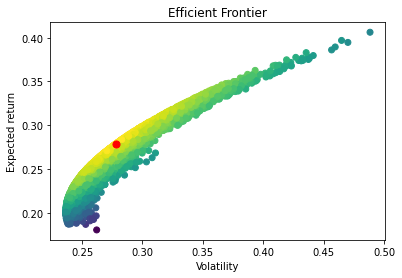

In [18]:
wallets = generate_wallets(df)
plot_efficient_frontier(wallets)

In [19]:
def best_portfolio(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    returns = wallets['returns']
    
    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()

    elif method == 'volatility':

        indice = np.array(vol).argmin()

    elif method == 'return':

        indice = np.array(returns).argmax()

    return weights[indice]

In [20]:
def plot_efficient_frontier(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'volatility':

        indice = np.array(vol).argmin()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'return': 

        indice = np.array(returns).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()